In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Backpropagation 
![Example](img/ExampleNetwork.png)
![derivative](img/Backpropagation_Derivatives.png)
- where ${\cal D}$ denotes a diagonal matrix depending on the activation function and ${\cal J}$ the cost function

In [2]:
# Example Network initial
W1 = np.array([[0.5,0.2,0.1],[0.2,0.5,0.2],[0.1,0.3,0.5],[0.1,0.1,0.1]])
W2 = np.array([[0.3,0.2,0.7,0.1],[0.2,0.1,0.1,0.3],[0.5,0.1,0.0,0.5],[0.4,0.3,0.2,0.4]])
W3 = np.array([[0.5,0.1,0.7,0.3],[0.2,0.8,0.1,0.9]])
x = np.array([[10,1,3]])
y = np.array([[3],[2]]) #label 

In [3]:
for i in range(10):
    z1 = np.matmul(W1,x.T)
    z2 = np.matmul(W2,z1)
    z3 = np.matmul(W3,z2)
    #NN function 
    o = np.dot(W3,np.dot(W2,np.dot(W1,x.T)))
    #mean squarred loss
    d_W3 = np.matmul((o-y),z2.T)
    d_W2 = np.matmul(W3.T,np.matmul((o-y),z1.T))
    d_W1 = np.matmul(W2.T,np.matmul(W3.T,np.matmul((o-y),x)))
    #update weights 
    lr = 0.01 #with 0.1 exploding gradients!!
    W3 = W3 - lr*d_W3
    W2 = W2 - lr*d_W2
    W1 = W1 - lr*d_W1
    o = np.dot(W3,np.dot(W2,np.dot(W1,x.T)))
    C = 0.5 * np.linalg.norm(o-y)
    print(C)

2.8957418060622993
1.759410906938798
1.495787099940126
1.199641223102295
0.8257595780151159
0.42150606113846595
0.12988657935433104
0.02152585583745908
0.002524317305285069
0.00041134261963809233


In [4]:
W3

array([[ 0.41607521, -0.01142428,  0.57328501,  0.15304749],
       [ 0.04821668,  0.66946597, -0.0706648 ,  0.6999977 ]])

# Activation functions 
![title](img/Activations.png)
# Can we use linear functions to approximate non-linear functions? 
- the approximation is possible and accurate to a certain point in a given range (example: in engineering, taylor approximation)
- for a continuous good approximation differnt linear functions need to be combined with varying definition area
- in Neural Networks the underlying data distribution is unknown and with the introduced non-linearity of the activation functions fitting a model results in most cases in higher accuracy 

# Why is bias important in neural networks?
- The bias term gives the neuron flexibility in the output. Imagine having a full zero input vector, without a bias term the only possible  output of the neuron would be zero due to w*x with x being a null-vector. 

# Convolutional Neural Network 
<div>
<img src="img/FullyConnectedLayer.jpeg" align="middle" width=700>
</div>

- 3 kernels with 5x5x1
- Maxpooling secures that the most dominant features are preserved and lower the computational load (condensing information)
- areas of application: classification, segmentation and auto-correlated data
- convolution with kernels result in feature maps
- number of feature maps (channels) depends on the number of different kernels 
- each kernel acts as a seperate filter "looking" for or respectively highlighting certain features and patterns

<div>
<img src="img/VGG16Architecture.png" align="middle" width=700>
</div>

# Bounding Boxes 
- used for creating bounding boxes on coordinates in python https://github.com/ulikoehler/UliEngineering
- creating a rectangular box between two points

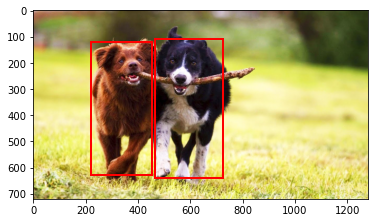

In [21]:
# example image used for bb creation
img = plt.imread("img/dogs.jpg")
#plt.imshow(img)
#bounding to coordinates in Form x1,y1,x2,y2
d1box,d2box = [221, 121, 454, 627] , [466, 640, 725, 110]
def draw_bbox(bbox,color = "red"):
    # converting the coordinates to plt parameters: upper-left x, upper-left y, width and height
    xmin = (bbox[0] if bbox[0] <= bbox[2] else bbox[2])
    ymin = (bbox[1] if bbox[1] <= bbox[3] else bbox[3])
    width = np.absolute(bbox[0]-bbox[2])
    height = np.absolute(bbox[1]-bbox[3])
    return plt.Rectangle((xmin,ymin),width,height, edgecolor=color, linewidth=2,fill=False,label="dog")
fig = plt.imshow(img)
fig.axes.add_patch(draw_bbox(d1box))
fig.axes.add_patch(draw_bbox(d2box));

# Autoencoders
<div>
<img src="img/Autoencoder.png" align="middle" width=700>
</div>

- idea of compressing data and reconstructing it
- goal is reconstruction of the original input with x being the original input and $\hat x$ the reconstructed input $${\cal L} = \left( x, \hat x \right)$$
- the bottleneck constrains the information passed -> forces the compression of information present
- to discourage the network from memorization (overfitting) a regularization term is used and often fitted with a parameter to adjust the trade-off between both objectives
$${\cal L}\left( {x,\hat x} \right) + \alpha * R$$
example regularizer is ridge regression penalizing the distance of the weights $w$ to the origin hence:
$${\cal L}\left( {x,\hat x} \right) + \frac{\alpha}{2} \|w\|^{2}_{2}$$


# Denoising encoders
![DenoisingAutoencoder](img/DenoisingAutoencoders.png)
- encourages the model to learn a generalizable encoding and decoding
- the effects of this noise in the learning process is visualized below, a vector field is created for mapping the input to the learned function 
![DenoisingAutoencoderVisualizedEffect](img/DenoisingLearningVisualized.png)

# Variational Autoencoders
- until now encoder network is outputting a single value for each encoding dimension <-> encoder represents each latent attribute with a probablity distribution 7 (latent distributions instead of latent attribute values)
- the encoder is often reffered to as recognition model, the deocder as generative model
- distributions are sampled to get values for reconstruction
![VariationalAutoencoder](img/VariationalAutoencoder.png)
![VAE](img/VAE.png)
- backpropagation doesnt work with the random sampling process in VAE
- with a reparametrization trick (shifting a randomly sampled parameter from a unit Gaussian by the latent distribution and scale it by the variance of the latent distribution) optimization can be performed

# Curve Fitting
- "fitting" a curve in a mathematical defined form (linear/quadratic/spline interpolation) to a set of given data points so that a defined function is minimized (e.g. mean squarred error given the approximated value and the data value provided)
- the parameters of the aprroximated function are varied in optimization steps

<div>
<img src="img/CurveFitting.jpg" align="middle" width="500"/>  
</div>

<div>
<img src="img/UnderOverfitting.png" align="middle" width="500"/>  
</div>

# Deep Belief Networks
- network of fully connected layers with symmetrical weight matrices ${\cal W}_0 = {\cal W}_1^T = {\cal W}_2$
- every layer serves as hidden layer for the nodes before and as input for the following
- the top layers contain undirected connections
- build on the model of multiple Restricted Boltzmann Machines as shown below

<div>
<img src="img/RBM.png" align="middle" width="500"/>  
</div>

<div>
<img src="img/dbm2.jpg" align="middle" width="500"/>  
</div>

# Recurrent Neural Network

<div>
<img src="img/RNN.png" align="middle" width="500"/>  
</div>

- Neural Networks with a "Memory" - previous outputs are used as inputs while containing hidden states
- adds a temporal dimension to the network -no temporal consistency given (output dependable on previous inputs)
- Backpropagation is done per timestep
- Loss function is sum over all time steps
- application field: NLP and speech recognition, Time-series data, continuous data(e.g. video)
- not constrained in input size, through sequences of input vectors

# LSTM - Long Short Term Memory
<div>
<img src="img/LSTM.png" align="middle" width="500"/>  
</div>

- special kind of RNN with more complex repeading "module chain"
- can even learn long-term dependencies
- cell state flows with some linear interactions - for passing information close to unchanged -

<div>
<img src="img/LSTM3-C-line.png" align="left" width="500"/>  
<img src="img/LSTM3-focus-C.png" align="right" width="500"/>  
<img src="img/LSTM3-focus-f.png" align="left" width="500"/>
<img src="img/LSTM3-focus-i.png" align="right" width="500"/>  
<img src="img/LSTM3-focus-o.png" align="left" width="500"/>  
</div>


- ${\cal f}_{\cal t}$ denotes the function of a forget-gate. It uses the input x and the output from the previous step to determine which information to forget. 
- ${\cal i}_{\cal t}$ denotes the function of a input-gate layer and determines which values should be updated. In combination with $\tilde{\cal C}_t$ which determines the amount that should be added the update of the cell state is performed:
$$ {\cal C}_t = {\cal f} \ast {\cal C}_{t-1}+{\cal i}_t \ast \tilde{\cal C}_t $$
Looking at the forget-gate and input-gate an example application can be shown: Some feature of the old state is worth forgetting and gets replaced by the new value determined by the input-gate tanh-layer combination.
- the last step is determining the output ${\cal h}_t$ by filtering the cell state trough a tanh-layer and combining it with the sigmoid-layer of the current combination of old output ${\cal h}_{t-1}$ and input ${\cal x}_t$

# Fully Connected Networks - Additional Informations
- Universal approximation theorem: "a network with only one hidden layer and a sufficient but finite number of neurons can approximate any continuous function to a reasonable accuracy"
- fully connected networks are "universal approximators" <-> not always converging!
<div>
    <img src="img/CurveApproximation.png" width="50%">
</div>
- each approximation step in the graph represents one neurons activity spectrum
<div>
    <img src="img/FunctionApproximation.png" width="50%">
</div>